In [34]:
import numpy as np
data=np.loadtxt("data.csv",delimiter=",")
input=data[:,0]
output=data[:,1]
number_of_data_points=input.shape[0]
print(number_of_data_points)

100


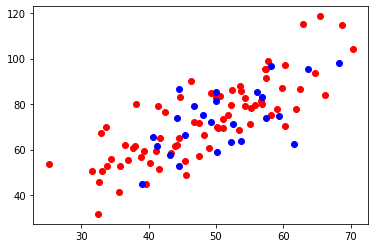

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(input,output)
plt.scatter(x_train,y_train,color="red")
plt.scatter(x_test,y_test,color="blue")
plt.show()

In [36]:
import pandas as pd

In [37]:
data=pd.read_csv("data.csv")
data.columns=["x","y"]

In [38]:
data

,x,y
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
94,50.030174,81.536991
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958


In [39]:
#adding feature x_x
data["x_x"]=data["x"]**2
data

,x,y,x_x
0,53.426804,68.777596,2854.423389
1,61.530358,62.562382,3785.984959
2,47.475640,71.546632,2253.936359
3,59.813208,87.230925,3577.619836
4,55.142188,78.211518,3040.660943
...,...,...,...
94,50.030174,81.536991,2503.018345
95,49.239765,72.111832,2424.554491
96,50.039576,85.232007,2503.959160
97,48.149859,66.224958,2318.408911


In [40]:
output=data["y"]
#now can drop output column from data and rename data as input
del data["y"]
input=data
print(input)
print(output)

            x          x_x
0   53.426804  2854.423389
1   61.530358  3785.984959
2   47.475640  2253.936359
3   59.813208  3577.619836
4   55.142188  3040.660943
..        ...          ...
94  50.030174  2503.018345
95  49.239765  2424.554491
96  50.039576  2503.959160
97  48.149859  2318.408911
98  25.128485   631.440741

[99 rows x 2 columns]
0     68.777596
1     62.562382
2     71.546632
3     87.230925
4     78.211518
        ...    
94    81.536991
95    72.111832
96    85.232007
97    66.224958
98    53.454394
Name: y, Length: 99, dtype: float64


In [52]:
input=np.array(input)
output=np.array(output)
x_train,x_test,y_train,y_test=train_test_split(input,output,random_state=1)
algorithm=LinearRegression()
algorithm.fit(x_train,y_train)
m=algorithm.coef_
c=algorithm.intercept_
print(m)
print(c)

[-0.53101005  0.01854584]
52.93236949421794


In [53]:
def predict(x,m1,m2,c):
    return m1*x+m2*(x**2)+c

In [54]:
m1=algorithm.coef_[0]
m2=algorithm.coef_[1]
x1=x_train[:,0] #1st parameter in training data
x2=x_test[:,0]
y_predict_train=predict(x1,m1,m2,c)
y_predict_test=predict(x2,m1,m2,c)
print(y_predict_test)

[ 68.02133124  84.17968773  84.78910592  82.71299668  60.38982895
  67.30343288  91.11661351  56.56229572  59.53900476 104.1152814
  61.5248285   83.72360529  79.94595042  81.05590597  72.92613691
  63.79653776  62.43834558  96.22392375  65.70664121  78.85738023
  69.52347477  55.37813312  62.51728214  62.71301799  99.03594725]


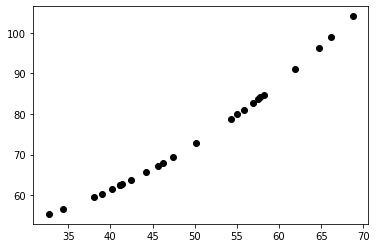

In [57]:
plt.scatter(x2,y_predict_test,color="black")
plt.show()

In [58]:
algorithm.score(x_test,y_test)

0.6023065203549628